1) ***Read a video file***

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Path to your video file
video_path = "/content/sample-5.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    while True:
        # Read a frame from the video
        ret, frame = cap.read()

        # Break the loop if the video has ended
        if not ret:
            break

        # Display the frame
        cv2_imshow(frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()


***Information extracting from video***

In [ ]:
import cv2

# Replace 'path_to_your_video_file.mp4' with the actual path of your video file
video_path = "/content/sample-5.mp4"

# Open a video file
cap = cv2.VideoCapture(video_path)

# Check if the video file is successfully opened
if not cap.isOpened():
    print("Error: Couldn't open video file.")
    exit()

# Get video information
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Display video information
print("Video Information:")
print(f"Frames per Second (fps): {fps}")
print(f"Total Frame Count: {frame_count}")
print(f"Frame Width: {width}")
print(f"Frame Height: {height}")

# Extract information for a sample frame
ret, frame = cap.read()
if ret:
    rows, columns, _ = frame.shape
    row_per_digit = rows // 10
    column_per_digit = columns // 10

    print("\nInformation for a Sample Frame:")
    print(f"Rows: {rows}")
    print(f"Columns: {columns}")
    print(f"Rows per Digit: {row_per_digit}")
    print(f"Columns per Digit: {column_per_digit}")

# Release the video capture object
cap.release()


Video Information:
Frames per Second (fps): 25.0
Total Frame Count: 752
Frame Width: 640
Frame Height: 360

Information for a Sample Frame:
Rows: 360
Columns: 640
Rows per Digit: 36
Columns per Digit: 64


2) ***Reading a frame***

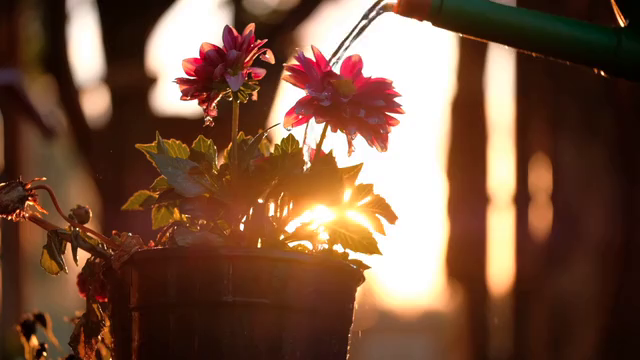

In [ ]:
import cv2

# Path to your video file
video_path = "/content/sample-5.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Read one frame from the video
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Display the frame
        cv2_imshow( frame)
        cv2.waitKey(0)
    else:
        print("Error: Could not read a frame from the video.")

    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()


3) ***Read a specific frame***

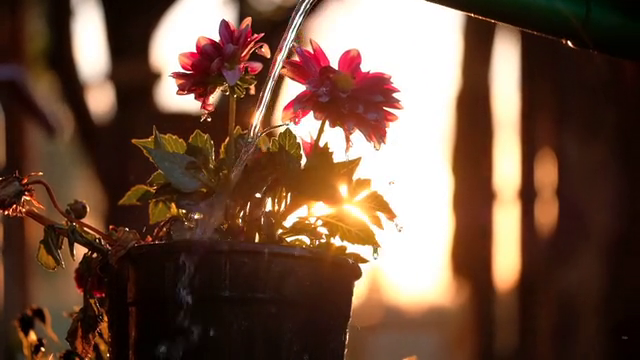

In [ ]:
import cv2

# Path to your video file
video_path = "/content/sample-5.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Set the frame number you want to read
    frame_number = 50
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the specific frame from the video
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Display the frame
        cv2_imshow( frame)
        cv2.waitKey(0)
    else:
        print(f"Error: Could not read frame {frame_number} from the video.")

    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()


4) Playing a video

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Path to your video file
video_path = "/content/sample-5.mp4"

# Read the video file as binary
with open(video_path, "rb") as f:
    video_data = f.read()

# Convert the video data to base64 encoding
video_encoded = b64encode(video_data).decode('utf-8')

# Create the HTML code to display the video
video_html = f"""
<video width="640" height="480" controls>
  <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
  Your browser does not support the video tag.
</video>
"""

# Display the video
HTML(video_html)


Output hidden; open in https://colab.research.google.com to view.

***5) Changing color model of the video***

In [ ]:
import cv2
from IPython.display import HTML, display
from base64 import b64encode

# Replace 'path_to_your_video_file.mp4' with the actual path of your video file
video_path = "/content/sample-5.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file is successfully opened
if not cap.isOpened():
    print("Error: Couldn't open video file.")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the processed video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = 'colored_output_video.avi'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process each frame and play the video
while True:
    # Read a frame
    ret, frame = cap.read()

    # Break the loop if the video has ended
    if not ret:
        break

    # Apply color inversion transformation
    inverted_frame = cv2.bitwise_not(frame)

    # Display the processed frame
    cv2_imshow(inverted_frame)

    # Write the processed frame to the output video file
    out.write(inverted_frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Convert the processed video to base64 for embedding in HTML
with open(output_path, "rb") as output_video_file:
    output_video_encoded = b64encode(output_video_file.read()).decode("utf-8")

# Generate HTML to embed the processed video
output_video_html = f"""
<video width="{width}" height="{height}" controls>
    <source src="data:video/mp4;base64,{output_video_encoded}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

# Display the HTML to play the processed video
display(HTML(output_video_html))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
from IPython.display import HTML, display
from base64 import b64encode

# Replace 'path_to_your_video_file.mp4' with the actual path of your video file
video_path = "/content/sample-5.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file is successfully opened
if not cap.isOpened():
    print("Error: Couldn't open video file.")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the processed video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = 'hsv_output_video.avi'
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process each frame and play the video
while True:
    # Read a frame
    ret, frame = cap.read()

    # Break the loop if the video has ended
    if not ret:
        break

    # Convert the frame to HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Display the processed frame
    cv2_imshow(hsv_frame)

    # Write the processed frame to the output video file
    out.write(hsv_frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Convert the processed video to base64 for embedding in HTML
with open(output_path, "rb") as output_video_file:
    output_video_encoded = b64encode(output_video_file.read()).decode("utf-8")

# Generate HTML to embed the processed video
output_video_html = f"""
<video width="{width}" height="{height}" controls>
    <source src="data:video/mp4;base64,{output_video_encoded}" type="video/mp4">
    Your browser does not support the video tag.
</video>
"""

# Display the HTML to play the processed video
display(HTML(output_video_html))


Output hidden; open in https://colab.research.google.com to view.

6) ***Resize the video***

In [ ]:
from IPython.display import HTML, display
from base64 import b64encode
import cv2

# Replace 'path_to_your_video_file.mp4' with the actual path of your video file
video_path = "/content/sample-5.mp4"

# Function to resize and play the video
def play_resized_video(video_path, target_width, target_height):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file is successfully opened
    if not cap.isOpened():
        print("Error: Couldn't open video file.")
        exit()

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Create a VideoWriter object to save the resized video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_path = 'resized_output_video.avi'
    out = cv2.VideoWriter(output_path, fourcc, fps, (target_width, target_height))

    # Process each frame, resize, and save to the output video file
    while True:
        # Read a frame
        ret, frame = cap.read()

        # Break the loop if the video has ended
        if not ret:
            break

        # Resize the frame to the target size
        resized_frame = cv2.resize(frame, (target_width, target_height))

        # Write the resized frame to the output video file
        out.write(resized_frame)

    # Release the video capture and writer objects
    cap.release()
    out.release()

    # Read the resized video file
    cap_resized = cv2.VideoCapture(output_path)

    # Get video properties of the resized video
    fps_resized = cap_resized.get(cv2.CAP_PROP_FPS)
    width_resized = int(cap_resized.get(cv2.CAP_PROP_FRAME_WIDTH))
    height_resized = int(cap_resized.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Read the resized video file and encode it to base64
    with open(output_path, "rb") as resized_video_file:
        resized_video_encoded = b64encode(resized_video_file.read()).decode("utf-8")

    # Read the original video file and encode it to base64
    with open(video_path, "rb") as original_video_file:
        original_video_encoded = b64encode(original_video_file.read()).decode("utf-8")

    # Generate HTML to embed the original and resized videos side by side
    video_html = f"""
    <div style="display: flex;">
        <div style="flex: 1; margin-right: 10px;">
            <video width="{width}" height="{height}" controls>
                <source src="data:video/mp4;base64,{original_video_encoded}" type="video/mp4">
                Your browser does not support the video tag.
            </video>
        </div>
        <div style="flex: 1;">
            <video width="{width_resized}" height="{height_resized}" controls>
                <source src="data:video/mp4;base64,{resized_video_encoded}" type="video/mp4">
                Your browser does not support the video tag.
            </video>
        </div>
    </div>
    """

    # Display the HTML to play the original and resized videos side by side
    display(HTML(video_html))

# Play the original and resized videos side by side
play_resized_video(video_path, 320, 240)


Output hidden; open in https://colab.research.google.com to view.